# Neural Networks
### Workshop 3 of DASIL's series on "Introduction to Machine Learning"
### Created by Martin Pollack, Yusen He, and Declan O'Reilly

In this Jupyter notebook we will teach you how to do deep learning using the `scikit-learn` package in Python.

Today we will use imported datasets again pertaining to Brexit.

In [4]:
import pandas as pd

training = pd.read_csv("brexit_training_data.csv")
testing = pd.read_csv("brexit_test_data.csv")

## Artificial Neural Networks

#### Dataset Introduction

Again, we will look at a classification problem, where the outcome can only take on 2 or more discrete values. But of course our predictors can be either continuous or discrete.

In our dataset, a 0 means someone wants the UK to stay in the EU, and a 1 means someone wants the UK to leave the EU.

So in this case we actually have a *binary classification* problem, meaning our category can only take on 2 discrete values. In most binary classification problems, like in this case, the categories are 0 and 1 indiciating the presence or absence of some trait.

We start by separating our two datasets into inputs and outputs.

In [12]:
X_training = training.drop(columns="Vote")
Y_training = training.Vote

X_testing = testing.drop(columns="Vote")
Y_testing = testing.Vote

In [19]:
X_training.head()

,Education,Gross Household Income,Skill,Age,Marrital Status,Country,Gender,WeightedAIS
0,17-19,Level 2 20~39k,Level 2,AgeOver85,Single,England,Female,0.524659
1,16 or under,Level 1 0~19k,Level 6,Age66-85,Married,England,Male,0.465145
2,20 or above,Level 3 40~59k,Level 8,Age66-85,Married,England,Male,0.047585
3,16 or under,Level 1 0~19k,Level 1,Age46-65,Married,Scotland,Male,-0.246023
4,16 or under,Level 1 0~19k,Level 6,Age36-45,Single,England,Female,-0.220175


In [13]:
Y_training.value_counts()

0    3870
1    3630
Name: Vote, dtype: int64

In [14]:
Y_testing.value_counts()

0    773
1    727
Name: Vote, dtype: int64

But to fit a neural network, all variables have to be numerical.

This means that we have to create *dummy* variables for our categorical outputs like education level and income. For each category, we create a column with 0's and 1's specifying if that row belongs to that category or not.

But if we know the dummy values for all but one category, we will know what the last dummy value is. For example, if we know that a person in a row is not single, then they must be married. Or if a person is from Scotland and not from Wales, then they cannot also be from England. Thus, we can specify `drop_first=True` to get rid of one dummy variable for each category group.

In [21]:
X_training = pd.get_dummies(X_training, drop_first = True)
X_testing = pd.get_dummies(X_testing, drop_first = True)

In [22]:
X_training.head()

,WeightedAIS,Education_17-19,Education_20 or above,Gross Household Income_Level 2 20~39k,Gross Household Income_Level 3 40~59k,Gross Household Income_Level 4 60~99k,Gross Household Income_Level 5 100k or above,Skill_Level 2,Skill_Level 3,Skill_Level 4,...,Skill_Level 7,Skill_Level 8,Age_Age36-45,Age_Age46-65,Age_Age66-85,Age_AgeOver85,Marrital Status_Single,Country_Scotland,Country_Wales,Gender_Male
0,0.524659,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0.465145,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.047585,0,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,-0.246023,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,-0.220175,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


#### Review: Creating and fitting a model

We start by importing the model we want.

Then, let's see what hyperparameters we have to consider when creating our neural network.

In [15]:
from sklearn.neural_network import MLPClassifier

MLPClassifier().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

We then again are going to do some hyperparameter tuning.

In [23]:
from sklearn.model_selection import GridSearchCV

classifier_ann = MLPClassifier(random_state=0)

hyperparameters = {"hidden_layer_sizes" : [ (5,), (10,), (25,)], 
                   "activation" : ["relu", "logistic"],
                   "learning_rate_init": [0.0001, 0.001, 0.01]}

tuned_ann = GridSearchCV(classifier_ann, hyperparameters)

tuned_ann.fit(X_training, Y_training)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

GridSearchCV(estimator=MLPClassifier(random_state=0),
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [(5,), (10,), (25,)],
                         'learning_rate_init': [0.0001, 0.001, 0.01]})

In [27]:
print(tuned_ann.best_params_)
print("Training R-squared:")
print(tuned_ann.score(X_training, Y_training))
print("Testing R-squared:")
print(tuned_ann.score(X_testing, Y_testing))

{'activation': 'logistic', 'hidden_layer_sizes': (25,), 'learning_rate_init': 0.001}
Training R-squared:
0.7632
Testing R-squared:
0.748


We can then predict using our model, and remember that Python does this with the best combination of hyperparameters considered.

In [24]:
pred_ann = tuned_ann.predict(X_testing)

#### Further Performance Assessment using Testing Data

*   Confusion Matrix
*   Accuracy
*   Sensitivity
*   Specificity
*   AUC

We now further asses our neural network.

Confusion Matrix for rf: 
 [[585 188]
 [190 537]]


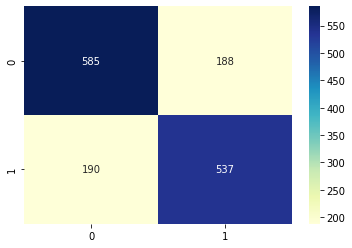

In [28]:
from sklearn.metrics import confusion_matrix
#Compute the confusion matrix
cm_ann = confusion_matrix(Y_testing, pred_ann)
print('Confusion Matrix for rf: \n', cm_ann)

#Plot the confusion matrix using seaborn
import seaborn as sns
sns.heatmap(cm_ann, annot=True,fmt="d", cmap="YlGnBu")

In [29]:
#Compute total test cases
totalRF=sum(sum(cm_ann))
#####from confusion matrix calculate accuracy
accuracy_ann=(cm_ann[0,0]+cm_ann[1,1])/totalRF
print ('Accuracy for Neural Network: ', accuracy_ann)

sensitivity_ann = cm_ann[1,1]/(cm_ann[1,0]+cm_ann[1,1])
print('Specificity for Neural Network: ', sensitivity_ann)

specificity_ann = cm_ann[0,0]/(cm_ann[0,0]+cm_ann[0,1])
print('Sensitivity for Neural Network: ', specificity_ann)

Accuracy for Neural Network:  0.748
Specificity for Neural Network:  0.7386519944979367
Sensitivity for Neural Network:  0.7567917205692108


Then, we compute the AUC. We use the `roc_auc_score` from `sklearn`

In [30]:
from sklearn.metrics import roc_auc_score

#We first compute the probability output from the Random Forest classifier
prob_ann = tuned_ann.predict_proba(X_testing)

#We compute the AUC score
auc_ann = roc_auc_score(Y_testing, prob_ann[:,1])
print('AUC for Neural Network: ', auc_ann)

AUC for Neural Network:  0.8120178799261883
